<a href="https://colab.research.google.com/github/quyunniii/JSC270_A3_simulation/blob/main/Jsc_270_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [ ]:
def beta_sampler(a, b, n):
  my_sample = [np.random.beta(a, b) for i in range(n)]
  return my_sample

0.4791089292661404


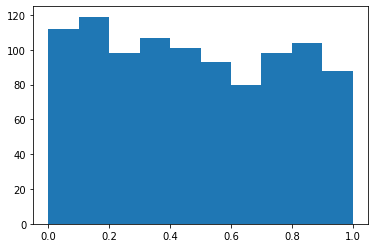

In [ ]:
##1000 draws from prior with beta(1,1)
beta_sample1 = beta_sampler(1, 1, 1000)
print(np.mean(beta_sample1))
plt.hist(beta_sample1)
plt.show()

0.22901546799264424


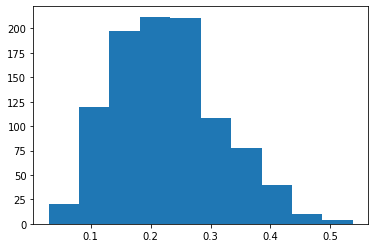

In [ ]:
##1000 draws from prior with beta(5, 17)
beta_sample2 = beta_sampler(5, 17, 1000)
print(np.mean(beta_sample2))
plt.hist(beta_sample2)
plt.show()

0.25949929242894354


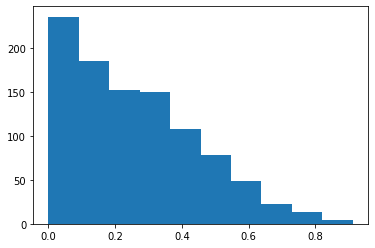

In [ ]:
##1000 draws from prior with beta(1,3)
beta_sample3 = beta_sampler(1, 3, 1000)
print(np.mean(beta_sample3))
plt.hist(beta_sample3)
plt.show()

0.20725597535813847


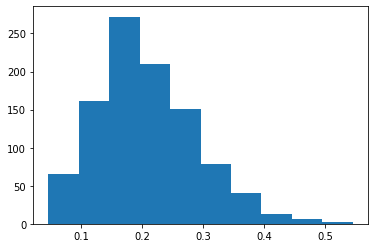

In [ ]:
##1000 draws from prior with beta(5,19)
beta_sample4 = beta_sampler(5, 19, 1000)
print(np.mean(beta_sample4))
plt.hist(beta_sample4)
plt.show()

0.2536055503840402


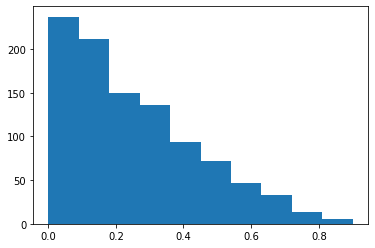

In [ ]:
##1000 draws from prior with beta(1,3)
beta_sample5 = beta_sampler(1, 3, 1000)
print(np.mean(beta_sample5))
plt.hist(beta_sample5)
plt.show()

0.5440522153980218


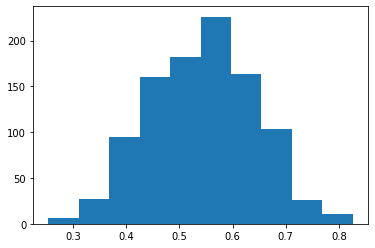

In [ ]:
##1000 draws from prior with beta(13,11)
beta_sample6 = beta_sampler(13, 11, 1000)
print(np.mean(beta_sample6))
plt.hist(beta_sample6)
plt.show()

In [ ]:
def expo_sampler(b, n):
  my_sample = [np.random.exponential(b) for i in range(n)]
  return my_sample

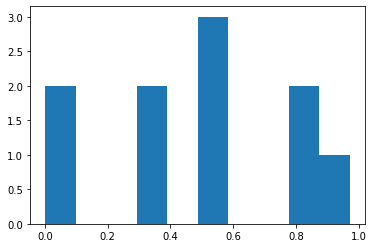

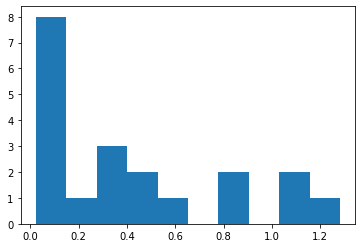

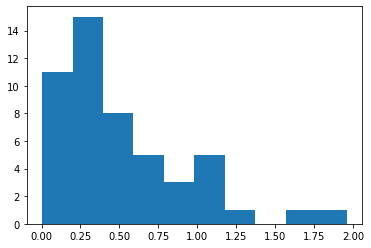

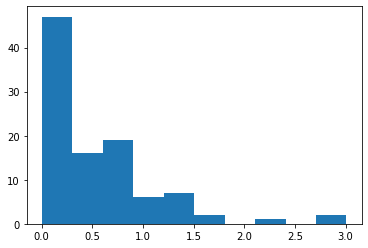

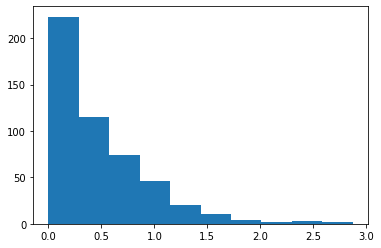

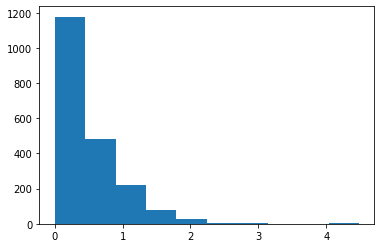

In [ ]:
expo_sample1 = expo_sampler(1/2, 10)
plt.hist(expo_sample1)
plt.show()

expo_sample2 = expo_sampler(1/2, 20)
plt.hist(expo_sample2)
plt.show()

expo_sample3 = expo_sampler(1/2, 50)
plt.hist(expo_sample3)
plt.show()

expo_sample4 = expo_sampler(1/2, 100)
plt.hist(expo_sample4)
plt.show()

expo_sample5 = expo_sampler(1/2, 500)
plt.hist(expo_sample5)
plt.show()

expo_sample6 = expo_sampler(1/2, 2000)
plt.hist(expo_sample6)
plt.show()

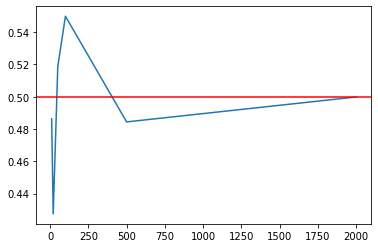

In [ ]:
plt.plot([10, 20, 50, 100, 500, 2000], 
         [np.mean(expo_sample1), 
          np.mean(expo_sample2),
          np.mean(expo_sample3),
          np.mean(expo_sample4),
          np.mean(expo_sample5),
          np.mean(expo_sample6)])
plt.xlabel = "smaple size"
plt.ylabel = "smaple mean"
plt.axhline(1/2, color='r', linestyle='-')
plt.show()

In [173]:
## sigmoid function:
def sigmoid(t):
  return np.exp(t) / (1 + np.exp(t))


## defining distribution for Q3
def my_dist(x1, x2, d, e):
  x = sigmoid(5 + 
              0.6 * x1 + 
              0.8 * x2 +
              0.4 * d +
              e)
  return x


## generate x1, x2, d, and epsilon
def generate_X(n):
  X = []
  x2 = []
  d = []
  e = []
  for i in range(n):
    x = [np.random.uniform(-100, 100),
         np.random.uniform(-150, 150),
         np.random.choice([0, 1, 2, 3, 4]),
         np.random.normal(0, 4)]
    X.append(x)
  return X



## defining sampler that generate n samples
def response(X):
  response = []
  for i in range(len(X)):
    response.append(my_dist(X[i][0],
                            X[i][1],
                            X[i][2],
                            X[i][3]))
  return response



def generate_label(c, x, reg):
  ## generate lable based on c
  prob = []
  for i in range(len(x)):
    prob.append(reg.predict([x[i]]))
  label = []
  for i in range(len(prob)):
    if prob[i] > c:
      label.append(1)
    else:
      label.append(0)
  return label





In [174]:
np.random.seed(270)
## generate 1000 presictors
x = generate_X(1000)

## generate true response
p = response(x)

## fit regression
reg = LinearRegression()
reg.fit(x, p)

## generate label
y = generate_label(0.5, x, reg)


In [175]:
## split data into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=10)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Instantiate the logistic model object
logisticreg2 = LogisticRegression(penalty='none', random_state=10)

# Fit the model to dataset
logisticreg2.fit(X_train, y_train)

[[-72.10391709397355, -27.795526027298152, 0, 3.1767443925562286], [93.99234496000943, -12.785428734952632, 3, 3.3274768919259823], [25.791827029802008, -125.62336315390729, 1, -0.23012849933574864], [-69.15569895083517, 47.34785799727325, 3, 1.2014268062814286], [86.49172772411066, -37.27375795713927, 2, -6.504024429588184], [-57.4907368214987, 83.81919671194566, 1, 5.049164985514914], [49.313344900981406, 134.59549686270083, 4, -0.8668132609313354], [-17.472020105938697, 59.750921681270995, 2, 1.2649977819902036], [-77.6515798455135, -100.47248290143175, 4, -0.38231660016198876], [-50.1773280206115, -108.37211358774468, 4, -0.3555587418545252], [61.205213428466266, 59.53532087833571, 3, -0.06258581248237173], [82.52926611875242, 118.02244676167743, 3, 2.585031091016948], [78.48155256227889, -107.27620880307617, 2, -2.495754658562996], [-29.959435011257355, -135.89245589478296, 0, 3.139332322248605], [60.63831820801954, 41.31323915912765, 4, -4.5526419144081975], [90.12378617475011, -

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0.98, 'ROC curve')

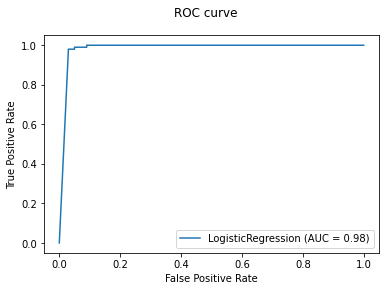

In [176]:
## roc curve for x_test,y_test
plt = plot_roc_curve(logisticreg, X_test, y_test)
plt.figure_.suptitle("ROC curve")

2
7
6
6
1
7
0
5
5
0


In [192]:
## defining resamle with size n, return precision score on the remaining OOB obsevations
def resample_fit(n):
  resample_x = []
  resample_y = []
  indices = []
  for i in range(n):
    index = np.random.randint(0, 1000)
    if index not in indices:
      indices.append(index)
    resample_x.append(x[index])
    resample_y.append(y[index])
  tree = DecisionTreeClassifier()
  tree.fit(resample_x, resample_y)

  ## find OOB
  remain_x = []
  remain_y = []
  for i in range(1000):
    if i not in indices:
      remain_x.append(x[i])
      remain_y.append(y[i])

  ## predict value
  remain_y_pred = tree.predict(remain_x)

  ## calculate precision score
  score = precision_score(remain_y, remain_y_pred)
  return score




In [203]:
resample_fit(1000)

0.9836065573770492